# 3. ロジスティック回帰モデル

本書は、機械学習レポートの、ロジスティック回帰モデルについてです。


## 1.1. 要点まとめ


### ロジスティック線形回帰モデル

( スライド page.56 - )

ロジスティック回帰は、分類問題に適用する。

ディープラーニングを使用するよりも、ロジスティック回帰を使用した方が良い場合がある。

- [Google AI Blog: Using Machine Learning to Predict Parking Difficulty](https://ai.googleblog.com/2017/02/using-machine-learning-to-predict.html)


分類問題には、2種類のアプローチがある。

- 識別的アプローチ<br>
$ p(C_k \mid \textbf{x} ) $ を直接モデル化する。<br>
識別関数の構成もある。 SVM など。

- 生成的アプローチ<br>
  1. $ p(C_k) $ と $ p(\textbf{x} \mid C_k ) $ をモデル化する。
  2. Bayes の定理を用いて、 $ p(C_k \mid \textbf{x} ) $ を求める。<br>

$$
p(C_k \mid \textbf{x} )
=
\frac{p(C_k, \textbf{x})}{p(\textbf{x})} \\
=
\frac{p(\textbf{x} \mid C_k) \cdot p(C_k)}
{p(\textbf{x})}
$$

生成的アプローチでは、外れ値の検出ができる、 GAN で使用できるメリットあり。


### シグモイド関数

( スライド page.58 - )

分類問題は、 $ y \in \mathbb{R} $ ではなく、 $ y \in \{0, 1\} $ を解くので、<br>
$ \textbf{x}^T \textbf{w} \in \mathbb{R} $ を、 $ [0, 1] $ につぶす必要がある。
そのための、シグモイド関数。

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}
$$


シグモイド関数の微分は、以下の通り。

$$
\sigma(z) = \frac{1}{1 + exp(-z)} = \{ 1 + exp(-z) \}^2 \\
\to
\frac{d \sigma(z)}{d z} = -1 \cdot \{ 1 + exp(-z) \}^2 \times exp(-z) \times (-1) \\
\because
\frac{d}{d z}\{ 1 + exp(-z) \} = exp(-z), \\
\frac{d}{d z}(-z) = -1
$$


$$
\to
=
\frac{1}{1 + exp(-z)} \times \frac{exp(-z)}{1 + exp(-z)} \\
=
\sigma(z) \times \frac{exp(-z)}{1 + exp(-z)} \\
=
\sigma(z) \times (1 - \sigma(z))
$$

$$
\because
1 - \sigma(z)
=
\frac{1 + exp(-z)}{1 + exp(-z)} - \frac{1}{1 + exp(-z)}
=
\frac{exp(-z)}{1 + exp(-z)}
$$

シグモイド関数の微分は、シグモイド関数で表すことができる。


### 数式

( スライド page.61 - )

データのパラメーターに対する線形結合に、シグモイド関数を適用して、分類結果 ( 1 である確率 ) を得る。

$$
P(Y = 1 \mid \textbf{x} ) = \sigma(w_0 + w_1 x1 + \cdots + w_m x_m)
$$


### 最尤推定

( スライド page.62 - )

確率分布に、確率 p で 1 、確率 1 - p で 0 を取る、ベルヌーイ分布を使用する。

データからデータを生成したであろう尤もらしい分布(パラメーター)を推定すること。

尤度関数は、

$$
P(y_1, y_2, \cdots, y_n; p) \\
=
P(y_1, y_2, \cdots, y_n \mid w_0, w_1, \cdots, w_m)
=
\prod_{i=1}^n p^{y_i} (1 - p)^{1 - y_i}
$$

$ p $ は、未知。 $ y_i $ が既知である。


また、尤度関数は、パラメーター $ \textbf{w} $ で表せられる、パラメーター $ \textbf{w} $ のみに依存する関数と言える。

この尤度関数を最大化する パラメーター $ \textbf{w} を探す推定となる。

尤度関数は、そのまま使わず、 $ -log L( w_0, w_1, \cdots, w_m ) $ として、対数を取る必要がある。確率 $ p \lt 0 $ なので、 $ \prod $ を続けると桁落ちしてしまうから。


### 勾配降下法

( スライド page.69 - )

回帰の時と違い、解析的には解けない。よって、勾配降下法を使用する。


以下の、負の対数尤度を、

$$
Loss \colon E(\textbf{w}) = -log L(\textbf{w}) \\
=
-\sum_{i=1}^n \{ y_i \cdot \log p_i + (1 - y_i) \log(1 - p_i) \}
$$

これを微分する。


$$
\frac{\partial E(\textbf{w})}{\partial \textbf{w}}
=
-\sum_{i=1}^n
\frac{\partial E_i}{\partial p_i}
\frac{\partial p_i}{\partial z_i}
\frac{\partial z_i}{\partial \textbf{w}} \\
=
-\sum_{i=1}^n
(
  \frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i}
)
p_i (1 - p_i)
\textbf{x}_i
$$

$$
=
-\sum_{i=1}^n
\{
  y_i (1 - p_i) - (1 - y_i) p_i
\} \textbf{x}_i \\
=
-\sum_{i=1}^n (
  y_i - p_i
) \textbf{x}_i
$$


微分した結果を勾配降下法に適用する。

$$
\textbf{w} (k +1) = \textbf{w}^k
-
\eta \frac{\partial E(\textbf{w})}
{\partial \textbf{w}} \\
=
\textbf{w}^k
+
\sum_{i=1}^n (
  y_i - p_i
) \textbf{x}_i
$$


### 確率的勾配降下法

( スライド page.72 - )

パラメーター全てを使用すと計算量が大きくなってしまうので、
少しずつ、または、1つずつ使ってパラメーターを更新する。


### 混合行列

( スライド page.73 - )

検証用データの結果と、モデルの予測結果から、
True Positive, False Positive, 
False Negative, True Negative に分類する。


### 分類の評価方法

( スライド page.75 - )

- 再現率 ( Recall )<br>
$ \frac{TP}{TP + FN} $

- 適合率 ( Precision )<br>
$ \frac{TP}{TP + FP} $

- F値<br>
適合率 ( Precision ) と 再現率 ( Recall ) の調和平均。適合率と再現率が共に高いことを示すため。


### タイタニックデータ

( スライド page.79 - )

欠損ありなどのデータの前処理が必要。欠損している値は平均値で埋める。


## 1.2. 実装演習


### np_logistic_regression.ipynb


#### キャプチャ

自身の環境において、最終コードセル[9]までの実行を確認した。


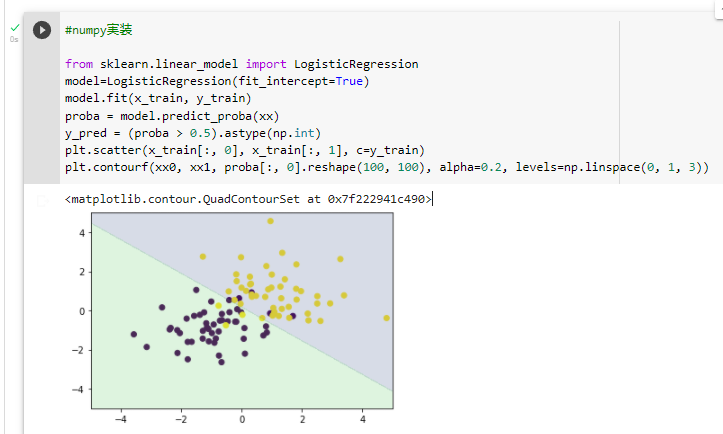

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


"ロジスティック回帰モデル" と "学習" について、講義と関連付けて、コードセル[5]を確認した。

$ p(C_k \mid \boldsymbol{x}) $

$p(y=1 | \boldsymbol{x}; \boldsymbol{w})$

$ \boldsymbol{x} $ は、与えられた説明変数の実現値。<br>
この説明変数の実現値が与えられた際に(条件付き確率)、<br>
$y=1$ となる確率を求める。

以降の "学習" で、 $ \prod_{i=1}^{n} $ の、
$ i= 1, \dots , n $ は試行回数を表す。
コインを投げた数とか。
訓練データの数とも言える。

講義 (1:47) では、ここで、 "尤度関数" が出てくる。

- 尤度関数<br>
  - > データは固定し、バラメータを変化させる
  - > 尤度関数を最大化するようなパラメータを選ぶ推定方法を**最尤推定** という。


### skl_logistic_regression.ipynb


#### キャプチャ

自身の環境において、最終コードセルまでの実行を確認した。


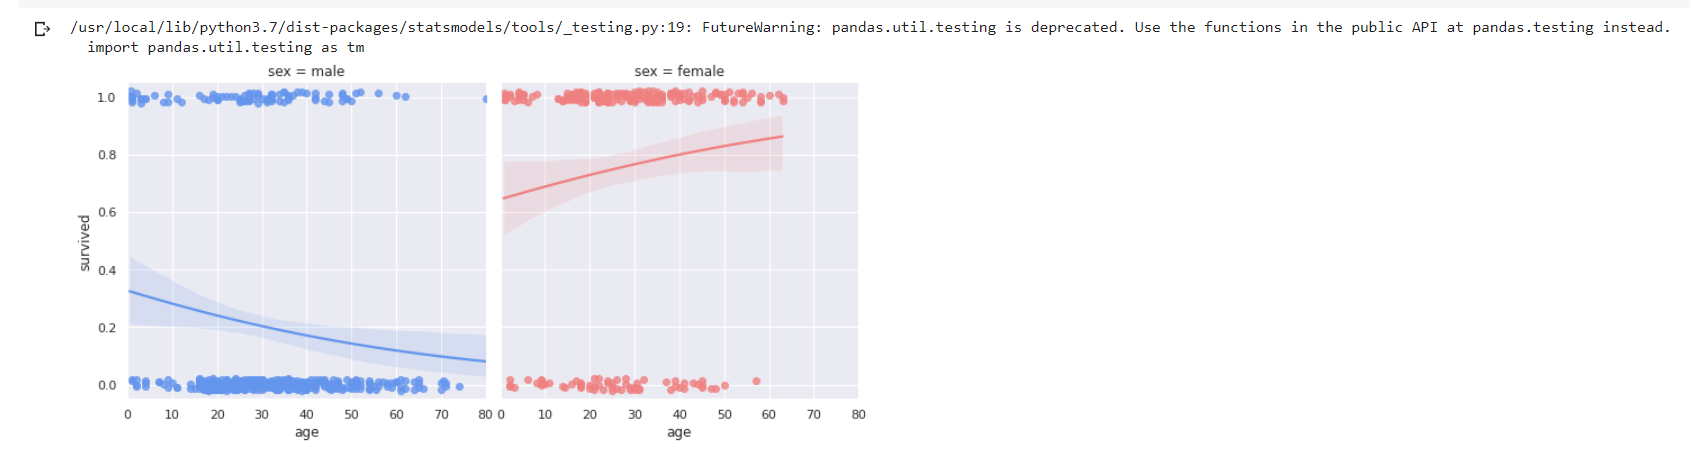

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


講義での欠損値の補完に対応するコードとして、以下を確認した。

```
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
```

また、新たな特徴量を作成する例として、以下を確認した。

```
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
```


自身の環境では、グラフが見え辛かったため、以下の様に表示方法を変更した。

```
# sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
#                 titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
#                 color='r', label='Not Survived', alpha=0.3)
# sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
#                 titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
#                 color='b', label='Survived', alpha=0.3)
# NOTE: y 軸方向(縦)に乱数を与えないと、点が重なって見辛いためと想定。 普通に固定値でずらしても?
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender'] + 0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender'] - 0.1,
                color='b', label='Survived', alpha=0.3)
```


classification_report() の出力の意味は、混同行列であることを確認した。

- [Understanding the Classification report through sklearn – Muthukrishnan](https://muthu.co/understanding-the-classification-report-in-sklearn/)

結果、チケット価格だけでない、 2 変数の方が高い結果となった。


`Show the survival proability as a function of age and sex` の、
グラフの意味を確認した。

- [Visualizing regression models — seaborn 0.11.2 documentation](https://seaborn.pydata.org/tutorial/regression.html)
